***Breast_Cancer_Detection***

Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score

In [23]:
from google.colab import files
uploaded=files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin (1).data


In [24]:
file=open("breast-cancer-wisconsin.data","r",encoding="utf8")


In [25]:
names = ["id","clump_thickness","uniform_cell_size","uniform_cell_shape","marginal_adhesion","single_epithelial_size",
         "bare_nulcei","bland_chromatin","normal_nuclei","mitoses","class"]
df = pd.read_csv(file,names=names)

In [26]:
df.replace('?', -99999, inplace=True)
print(df.axes)
df.drop(['id'], 1, inplace=True)

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nulcei',
       'bland_chromatin', 'normal_nuclei', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


<ipython-input-26-ce083e1aefb1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


In [27]:
print(df.loc[0])
print(df.describe())

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nulcei               1
bland_chromatin           3
normal_nuclei             1
mitoses                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.

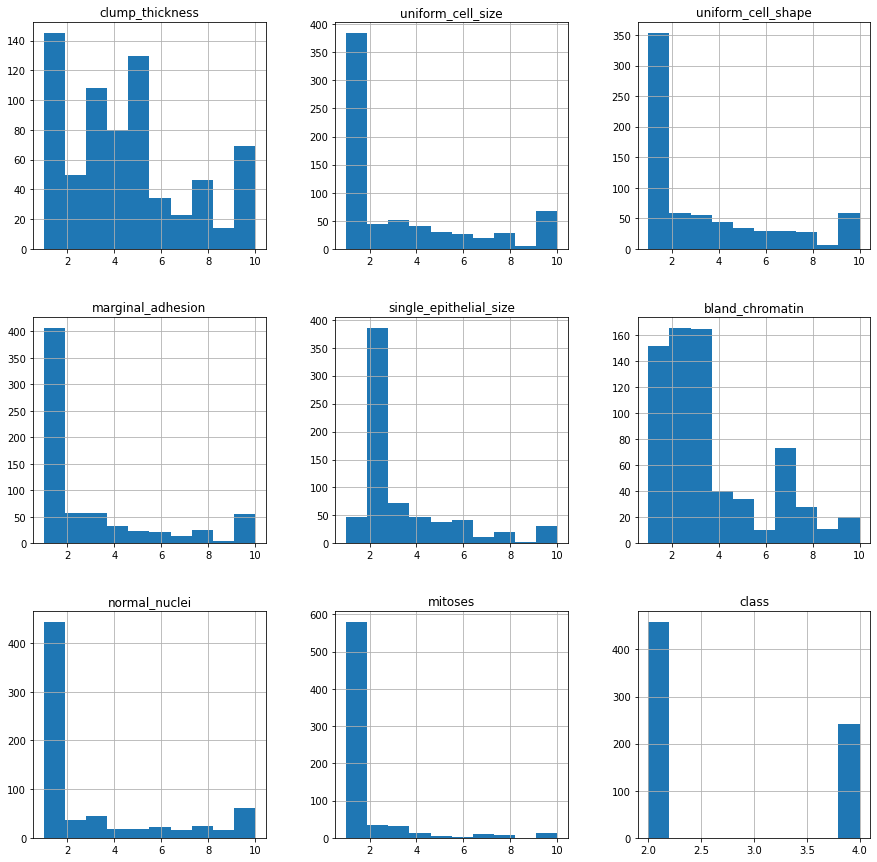

In [28]:
df.hist(figsize=(15,15))
plt.show()

In [29]:
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

<ipython-input-29-3eec9626e94c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(df.drop(['class'],1))


In [30]:
seed=8
scoring='accuracy'

In [31]:
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

In [32]:
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=19,shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f  (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.978645  (0.025006)
SVM: 0.654628  (0.074883)


In [33]:
for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions, zero_division=1))

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        92
           4       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.6571428571428571
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       1.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.83      0.50      0.40       140
weighted avg       0.77      0.66      0.52       140

